In [1]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.1 _CudaDeviceProperties(name='TITAN RTX', major=7, minor=5, total_memory=24219MB, multi_processor_count=72)


In [2]:
!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


In [3]:
!curl -L "https://app.roboflow.com/ds/C1Q0DVNFKs?key=GOaL8Ty8Ud" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   890  100   890    0     0    274      0  0:00:03  0:00:03 --:--:--   274
100 26.9M  100 26.9M    0     0  5280k      0  0:00:05  0:00:05 --:--:-- 34.1M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/13_Interview_Interview_2_People_Visible_13_260_jpg.rf.22037400d8bab636f2d9ca9546c162c5.jpg  
 extracting: test/13_Interview_Interview_2_People_Visible_13_260_jpg.rf.22037400d8bab636f2d9ca9546c162c5.txt  
 extracting: test/13_Interview_Interview_On_Location_13_190_jpg.rf.9c5cbc9f930b13f1dcb5a7bd275a2586.jpg  
 extracting: test/13_Interview_Interview_On_Location_13_190_jpg.rf.9c5cbc9f930b13f1dcb5a7bd275a2586.txt  
 extracting: test/13_Interview_Interview_On_Location_13_334_jpg.rf.0c213099e06f9e66d218ba965042de90.jpg  
 extracting: test/13_Interview_Interview_On_Location_13_334_jpg.

In [2]:
%cd train

/notebook/article/intro_to_cv/Yolo3/train


In [3]:
%ls

_darknet.labels  images/  labels/  roboflow_data.names


In [6]:
%mkdir labels
%mkdir images

In [7]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [4]:
%cd images

/notebook/article/intro_to_cv/Yolo3/train/images


In [5]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [6]:
%cat train_images_roboflow.txt

../train/images/test_00000543_jpg.rf.dac3aa91d8f517a4dbd37ca4b86717d0.jpg
../train/images/45_Balloonist_Balloonist_45_508_jpg.rf.1a0c0fcf2955700c4fffba0c88519883.jpg
../train/images/13_Interview_Interview_On_Location_13_287_jpg.rf.8f5ffcad6e959fc68347ead92654f6d6.jpg
../train/images/test_00001476_jpg.rf.b0857aab3386b7234e671779e4b6c183.jpg
../train/images/40_Gymnastics_Gymnastics_40_566_jpg.rf.fe83da0d3be479bb29466382789ba6cc.jpg
../train/images/16_Award_Ceremony_Awards_Ceremony_16_59_jpg.rf.fc6a62852353afa37d5468299fc75816.jpg
../train/images/19_Couple_Couple_19_873_jpg.rf.fc334cdefc9a26ee2b431e1a3732b50a.jpg
../train/images/13_Interview_Interview_On_Location_13_849_jpg.rf.930c8fc432fef7afbfb686b2e9a70d4c.jpg
../train/images/13_Interview_Interview_Sequences_13_33_jpg.rf.6c4e685f1551822f90e2ecf3118e8172.jpg
../train/images/test_00000201_jpg.rf.c208cca9a1637fd297011a0ca7cc7fa3.jpg
../train/images/13_Interview_Interview_On_Location_13_179_jpg.rf.db9501d8e515f6146ddddae9baf2420a.jpg
../tr

In [7]:
%cd ../../valid

/notebook/article/intro_to_cv/Yolo3/valid


In [12]:
%mkdir labels
%mkdir images

In [13]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [8]:
%cd images

/notebook/article/intro_to_cv/Yolo3/valid/images


In [9]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [10]:
%cat valid_images_roboflow.txt

../valid/images/31_Waiter_Waitress_Waiter_Waitress_31_227_jpg.rf.560c6c1814fe8466e5468a83a93e7a22.jpg
../valid/images/41_Swimming_Swimmer_41_659_jpg.rf.07cf3fd5e1c08761f1b3569fd6a3d564.jpg
../valid/images/51_Dresses_wearingdress_51_815_jpg.rf.887f52480339a873999f2c375a9e1fe9.jpg
../valid/images/27_Spa_Spa_27_329_jpg.rf.9d1bd172bc22c09e151eb32012381ef0.jpg
../valid/images/38_Tennis_Tennis_38_182_jpg.rf.d4d5609fad26a9681d5e2eb6ea12ffbd.jpg
../valid/images/28_Sports_Fan_Sports_Fan_28_448_jpg.rf.3eb11d7d2e0459c370c9dfd55e331d07.jpg
../valid/images/test_00000757_jpg.rf.130418bdf2f85cf0ceb09c358a72100f.jpg
../valid/images/test_00000910_jpg.rf.1f09d278de20f40fed8fbdface52b23a.jpg
../valid/images/51_Dresses_wearingdress_51_610_jpg.rf.d3a8bd409ae917cb5d0e3facebfdabef.jpg
../valid/images/9_Press_Conference_Press_Conference_9_182_jpg.rf.5eebf8e96ab9ff1f82befb68ac6546bb.jpg
../valid/images/13_Interview_Interview_Sequences_13_586_jpg.rf.1efb0075c0bc42efbb02dfd52e66c67d.jpg
../valid/images/52_Photog

In [11]:
%cd ../../yolov3/data

/notebook/article/intro_to_cv/Yolo3/yolov3/data


In [12]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

face
face_mask
face_nask

In [13]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [14]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
        for line in f:
            classes += 1
    return classes

In [15]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [16]:
# display updated number of classes
%cat roboflow.data

classes=3
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


In [17]:
%cd ../

/notebook/article/intro_to_cv/Yolo3/yolov3


In [20]:
!python train.py --data data/roboflow.data --epochs 20

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/roboflow.data', device='', epochs=20, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='TITAN RTX', total_memory=24219MB)
           device1 _CudaDeviceProperties(name='TITAN RTX', total_memory=24220MB)
           device2 _CudaDeviceProperties(name='TITAN RTX', total_memory=24220MB)
           device3 _CudaDeviceProperties(name='TITAN RTX', total_memory=24220MB)

2020-12-17 22:55:20.931410: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 D

In [21]:
from utils import utils; utils.plot_results()

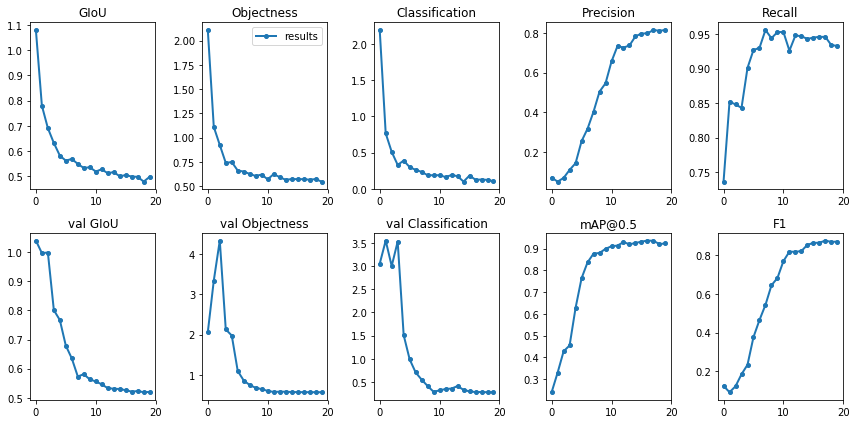

In [22]:
utils.plot_results()

In [26]:
!python detect.py --weights weights/last.pt --source=../test --names=../train/roboflow_data.names

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='../train/roboflow_data.names', output='output', save_txt=False, source='../test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='TITAN RTX', total_memory=24219MB)
           device1 _CudaDeviceProperties(name='TITAN RTX', total_memory=24220MB)
           device2 _CudaDeviceProperties(name='TITAN RTX', total_memory=24220MB)
           device3 _CudaDeviceProperties(name='TITAN RTX', total_memory=24220MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
/notebook/article/intro_to_cv/Yolo3/yolov3/utils/utils.py:532: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  i, j = (pred[:, 5:] > con

In [27]:
# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

13_Interview_Interview_Sequences_13_270_jpg.rf.0c364b0365e55fd7a691d2fa2c190b30.jpg


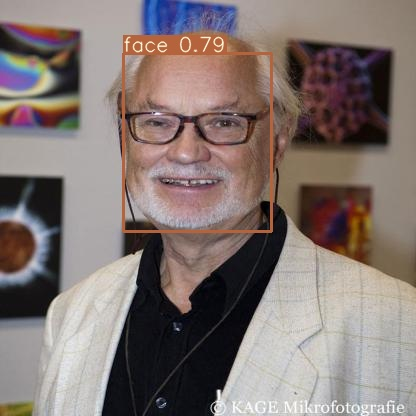

In [39]:
# plot just one random image prediction
filename = random.choice(os.listdir('./output'))
print(filename)
Image('./output/' + filename)